Step 1: Download Dataset

Step 2: Importing The Libraries

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Step 3: Read the Dataset

In [79]:
#data collection
df = pd.read_csv(r"D:\ujjwal\projects\GDP-per-capita-prediction\dataset\DatasetGDP.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [80]:
df.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [81]:
# Understanding the data
df.shape

(227, 20)

In [82]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


Step 4: Univariate analysis


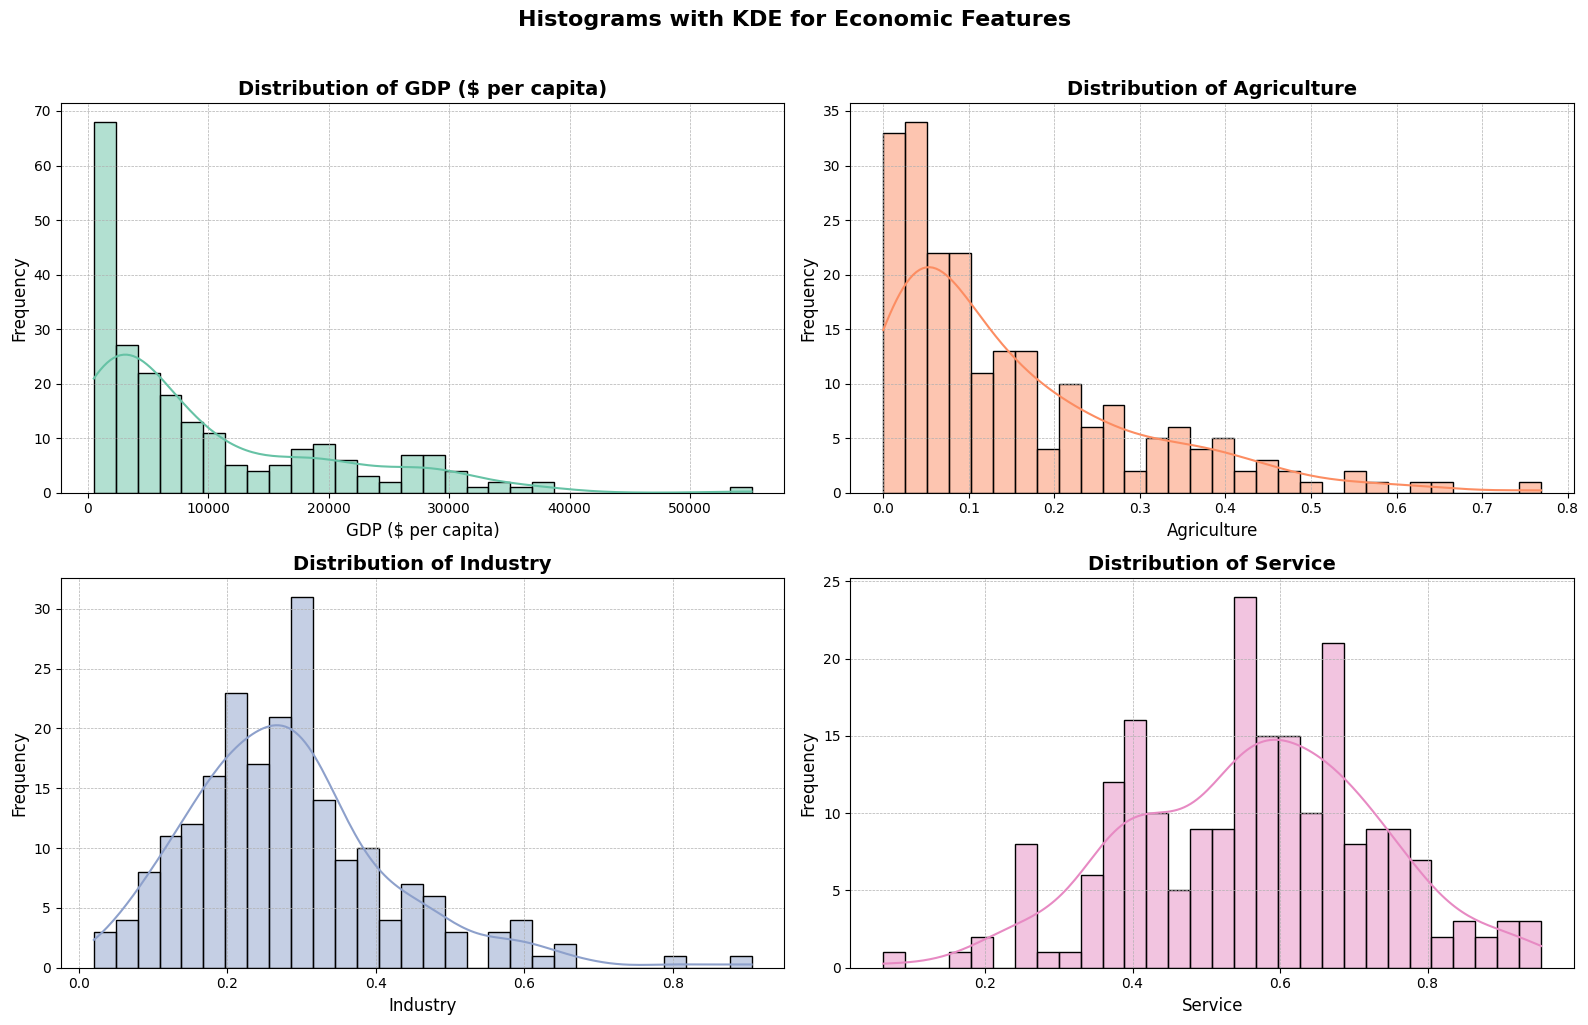

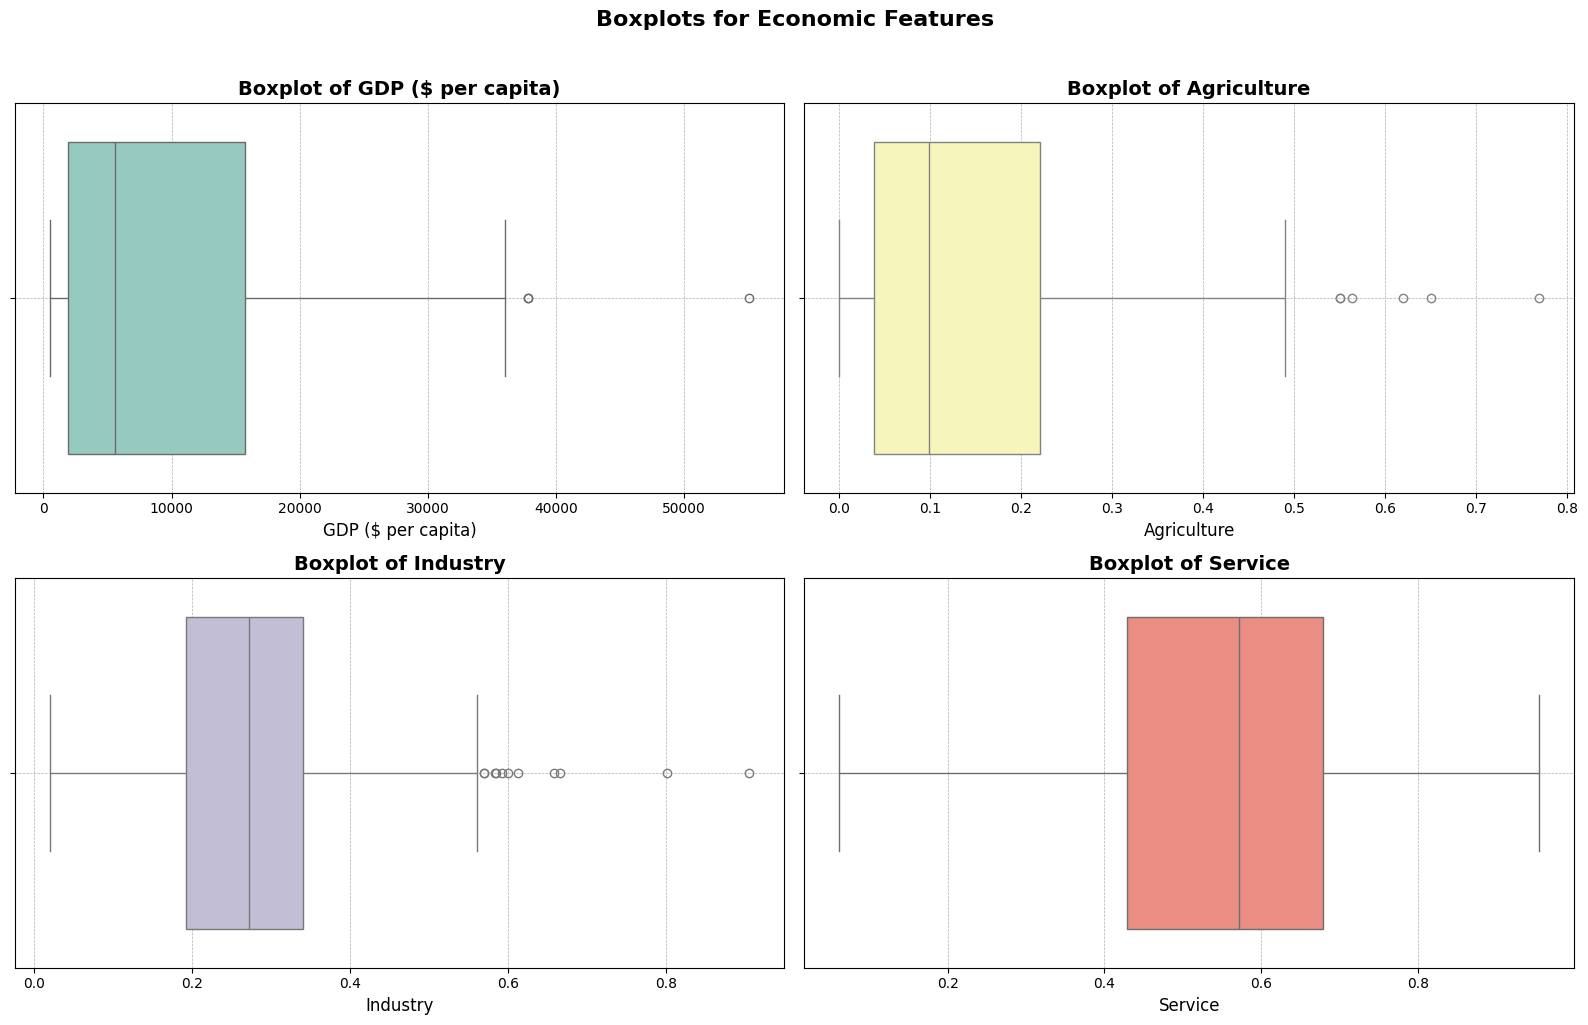

In [83]:
# Histogram + KDE
colors = sns.color_palette("Set2", 4)  

plt.figure(figsize=(16, 10))

for i, col in enumerate(['GDP ($ per capita)', 'Agriculture', 'Industry', 'Service']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Histograms with KDE for Economic Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot
colors = sns.color_palette("Set3", 4)  

plt.figure(figsize=(16, 10))

for i, col in enumerate(['GDP ($ per capita)', 'Agriculture', 'Industry', 'Service']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Boxplots for Economic Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

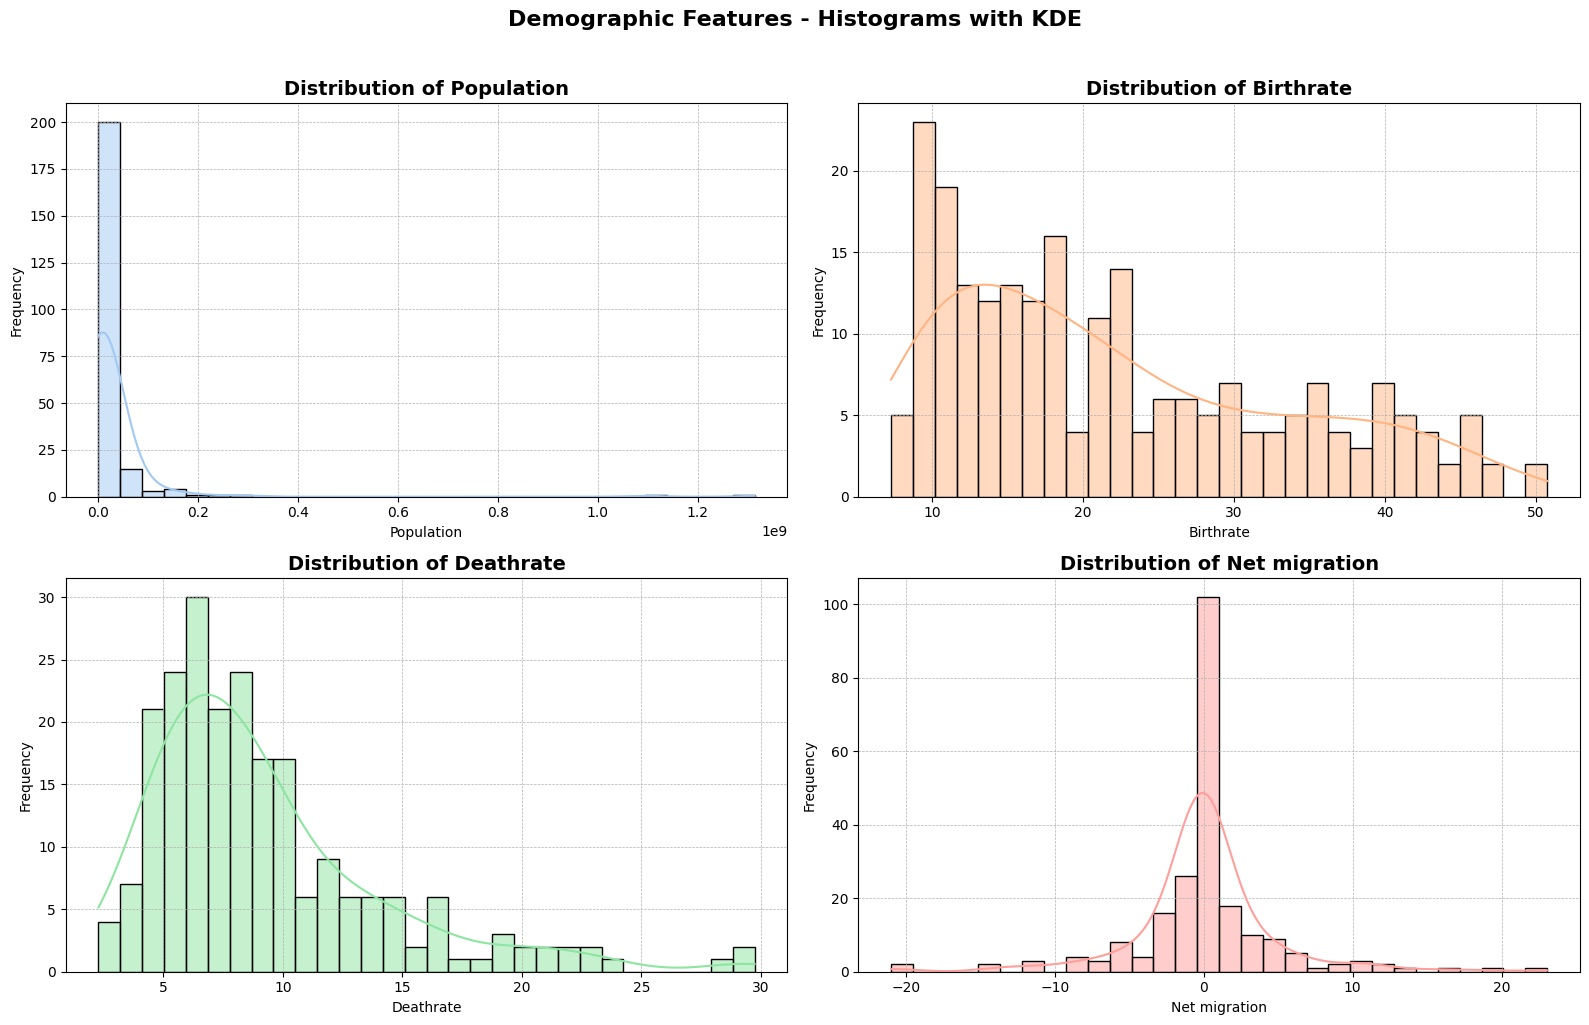

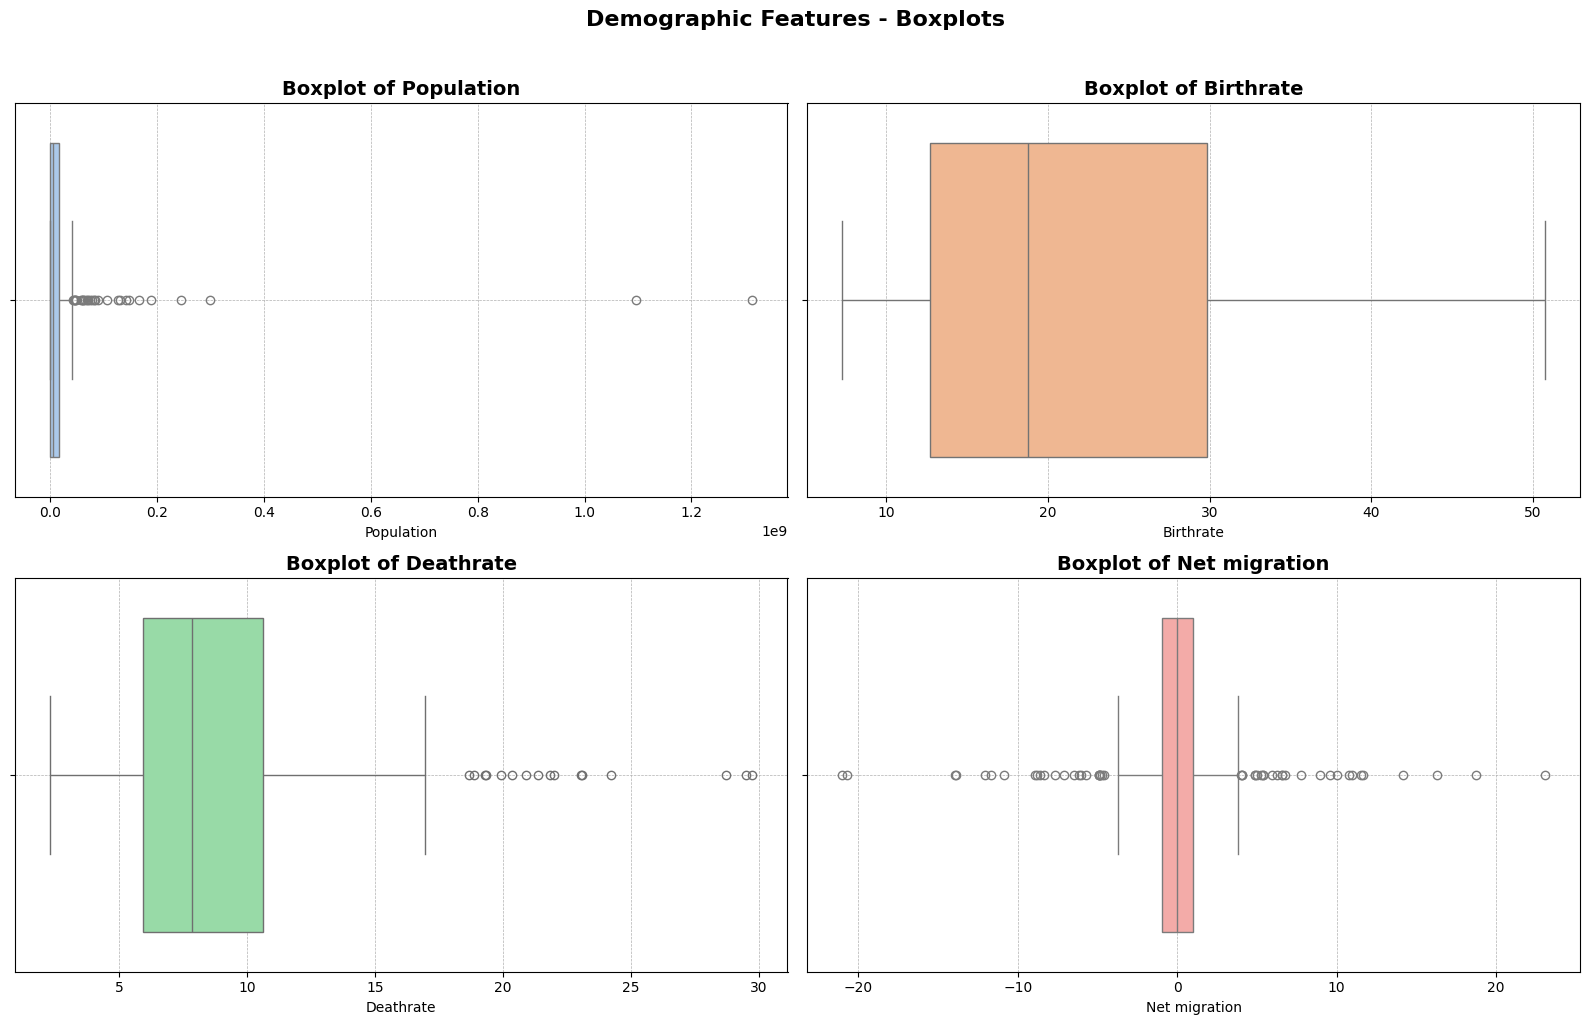

In [84]:
# Histogram + KDE
demo_cols = ['Population', 'Birthrate', 'Deathrate', 'Net migration']
colors = sns.color_palette("pastel", len(demo_cols))

plt.figure(figsize=(16, 10))
for i, col in enumerate(demo_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Demographic Features - Histograms with KDE", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(16, 10))
for i, col in enumerate(demo_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Demographic Features - Boxplots", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


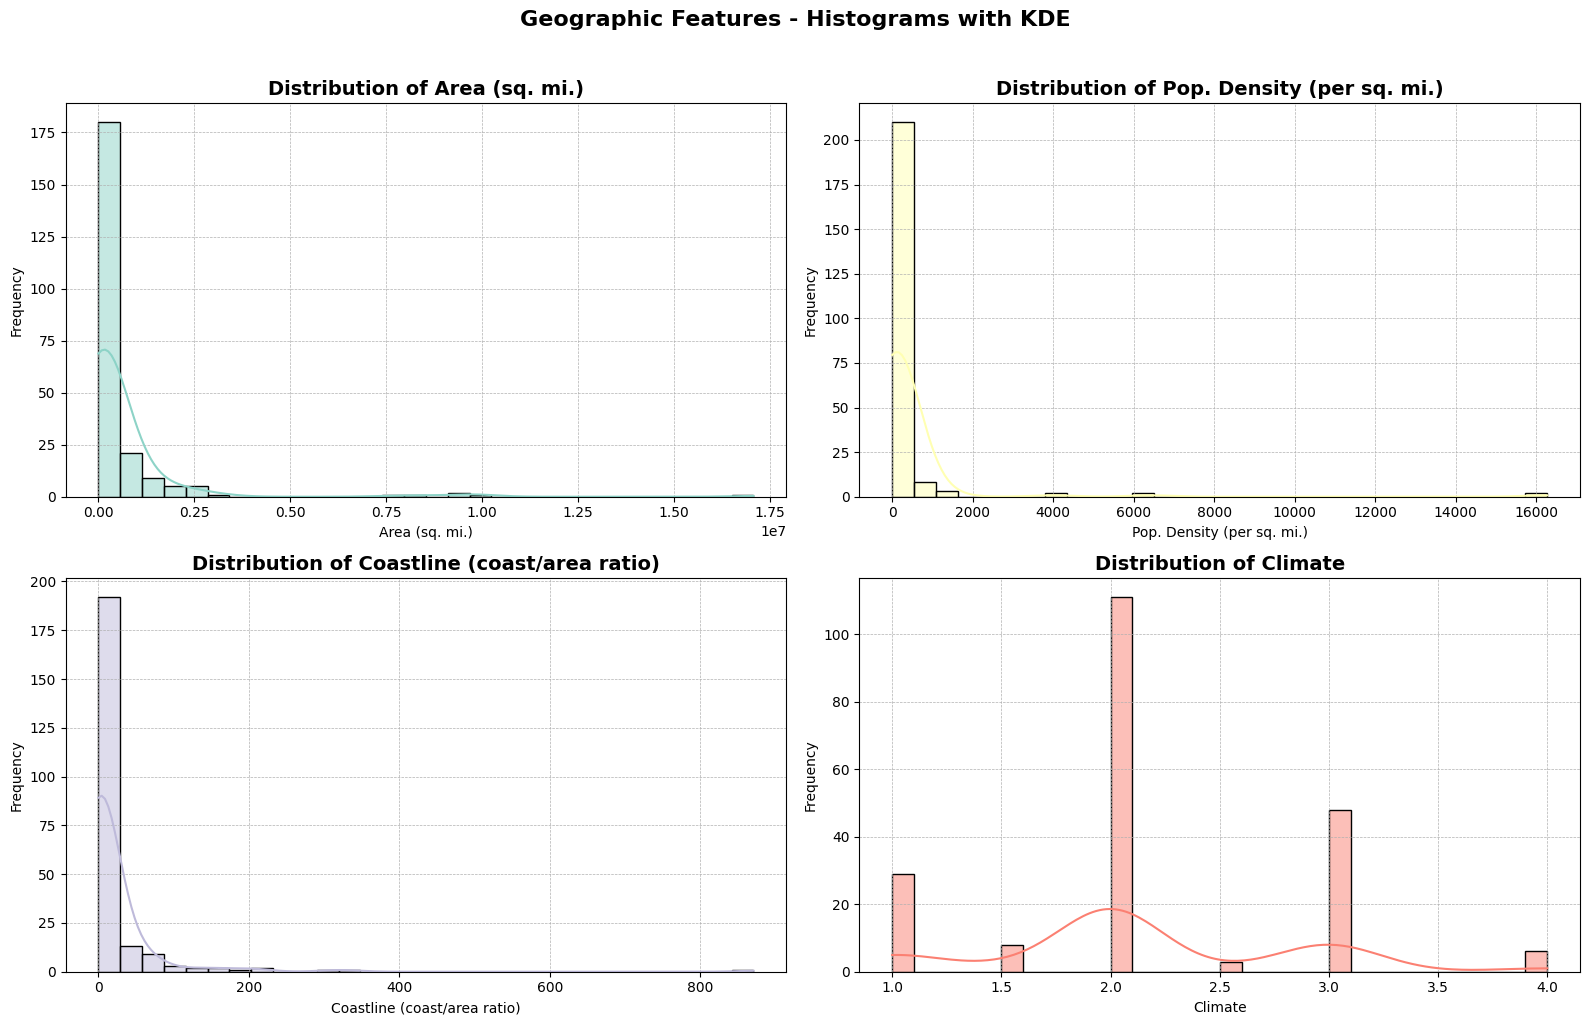

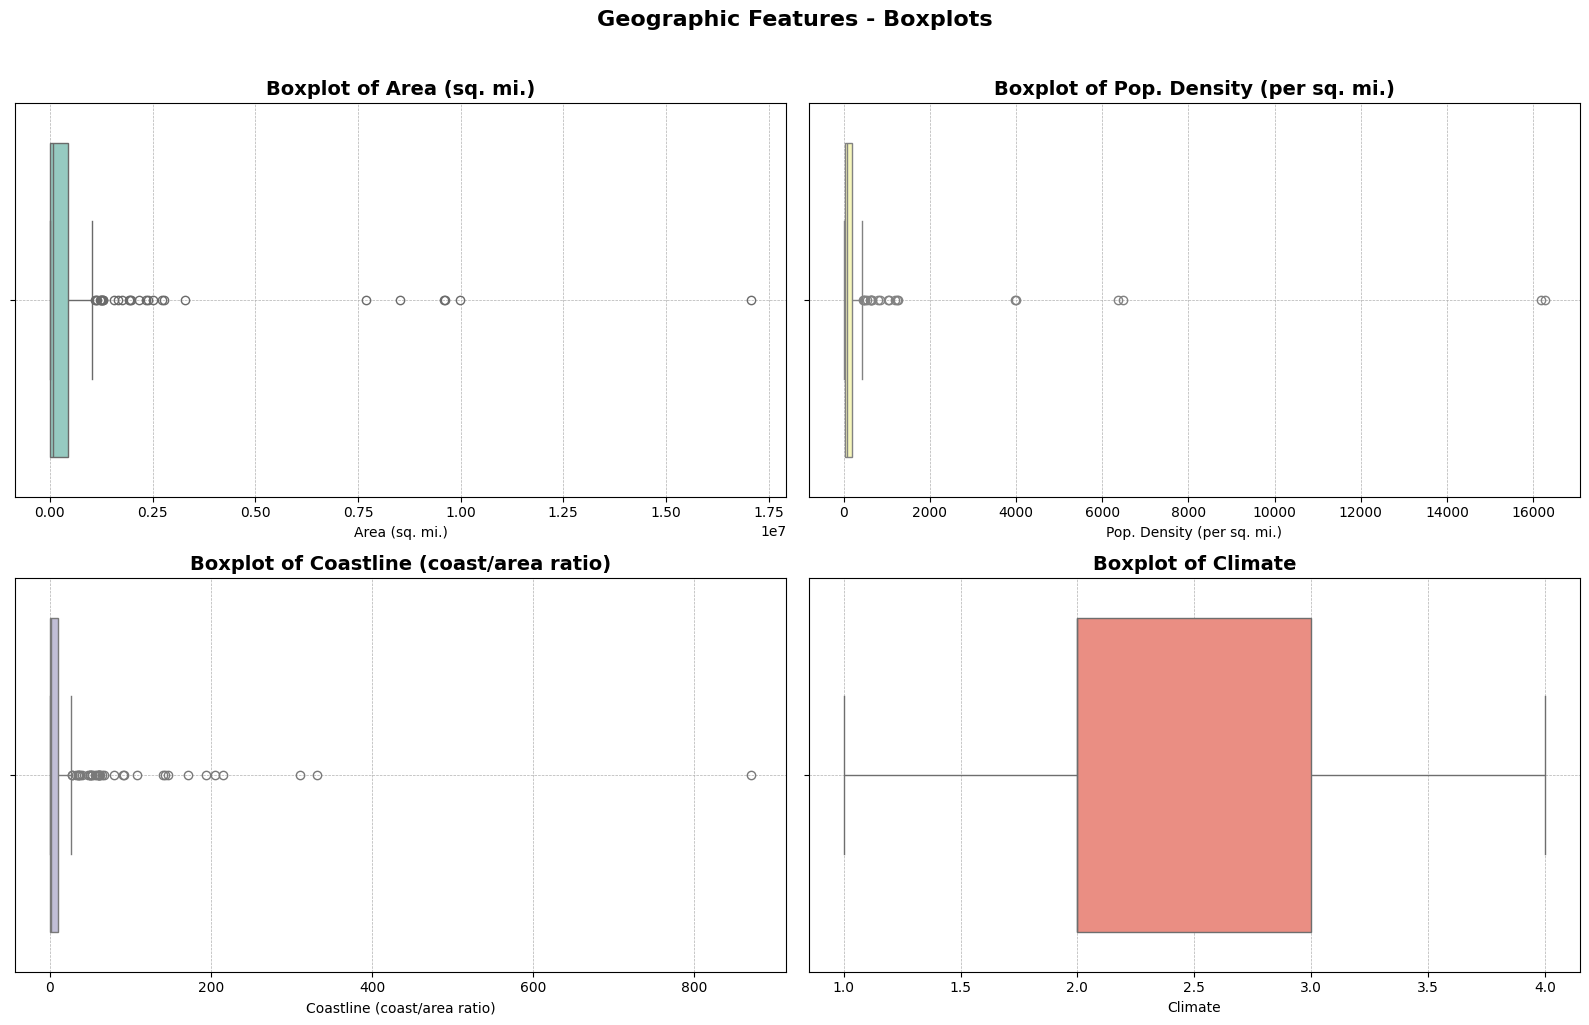

In [85]:
# Histogram + KDE
geo_cols = ['Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Climate']
colors = sns.color_palette("Set3", len(geo_cols))

plt.figure(figsize=(16, 10))
for i, col in enumerate(geo_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Geographic Features - Histograms with KDE", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(16, 10))
for i, col in enumerate(geo_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Geographic Features - Boxplots", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


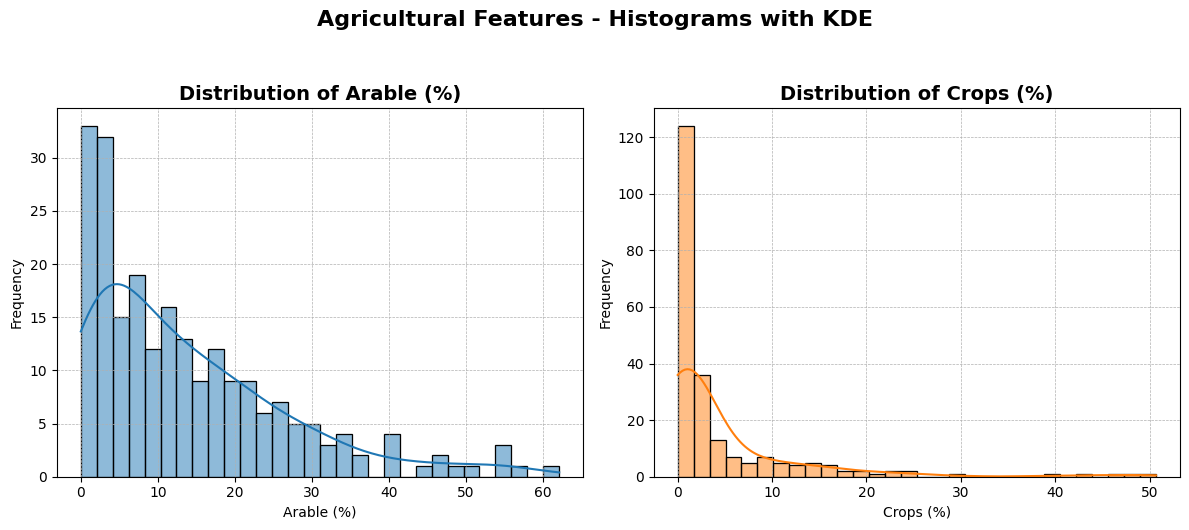

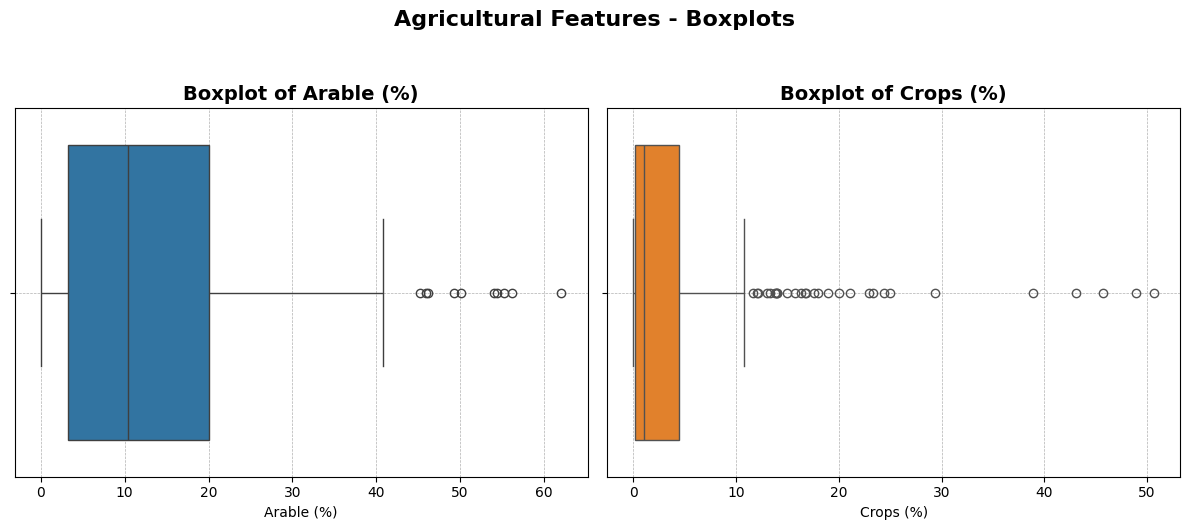

In [86]:
# Histogram + KDE
agri_cols = ['Arable (%)', 'Crops (%)']
colors = sns.color_palette("tab10", len(agri_cols))

plt.figure(figsize=(12, 5))
for i, col in enumerate(agri_cols):
    plt.subplot(1, len(agri_cols), i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Agricultural Features - Histograms with KDE", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


# Boxplot
plt.figure(figsize=(12, 5))
for i, col in enumerate(agri_cols):
    plt.subplot(1, len(agri_cols), i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Agricultural Features - Boxplots", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()



In [87]:
# Handling missing values
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

<Axes: >

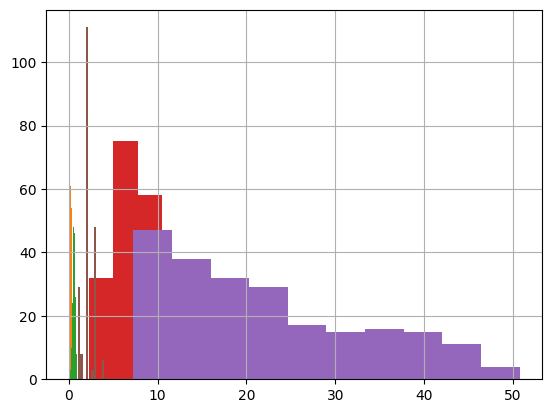

In [88]:
# checking skewness for median or mean
df["Agriculture"].hist()
df["Industry"].hist()
df["Service"].hist()
df["Deathrate"].hist()
df["Birthrate"].hist()
df["Climate"].hist()

In [89]:
# Filling missing values
df["Agriculture"] = df["Agriculture"].fillna(df["Agriculture"].median())
df["Industry"] = df["Industry"].fillna(df["Industry"].median())
df["Service"] = df["Service"].fillna(df["Service"].mean())
df["Birthrate"] = df["Birthrate"].fillna(df["Birthrate"].median())
df["Deathrate"] = df["Deathrate"].fillna(df["Deathrate"].median())
df["Climate"] = df["Climate"].fillna(df["Climate"].mode()[0])  
df["Crops (%)"] = df["Crops (%)"].fillna(df["Crops (%)"].median())
df["Arable (%)"] = df["Arable (%)"].fillna(df["Arable (%)"].median())
df["Phones (per 1000)"] = df["Phones (per 1000)"].fillna(df["Phones (per 1000)"].median())
df["Literacy (%)"] = df["Literacy (%)"].fillna(df["Literacy (%)"].median())
df["Infant mortality (per 1000 births)"] = df["Infant mortality (per 1000 births)"].fillna(df["Infant mortality (per 1000 births)"].median())
df["Net migration"] = df["Net migration"].fillna(df["Net migration"].mean())

# Dropping uneccessary values
df.drop(columns=["Other (%)"], inplace=True)
df = df.dropna(subset=['GDP ($ per capita)'])



In [90]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [91]:
# Check for Duplicates
df.duplicated().sum()


np.int64(0)

In [92]:
# Remove Unneccessary columns
df.drop(["Country", "Region"], axis=1, inplace=True)


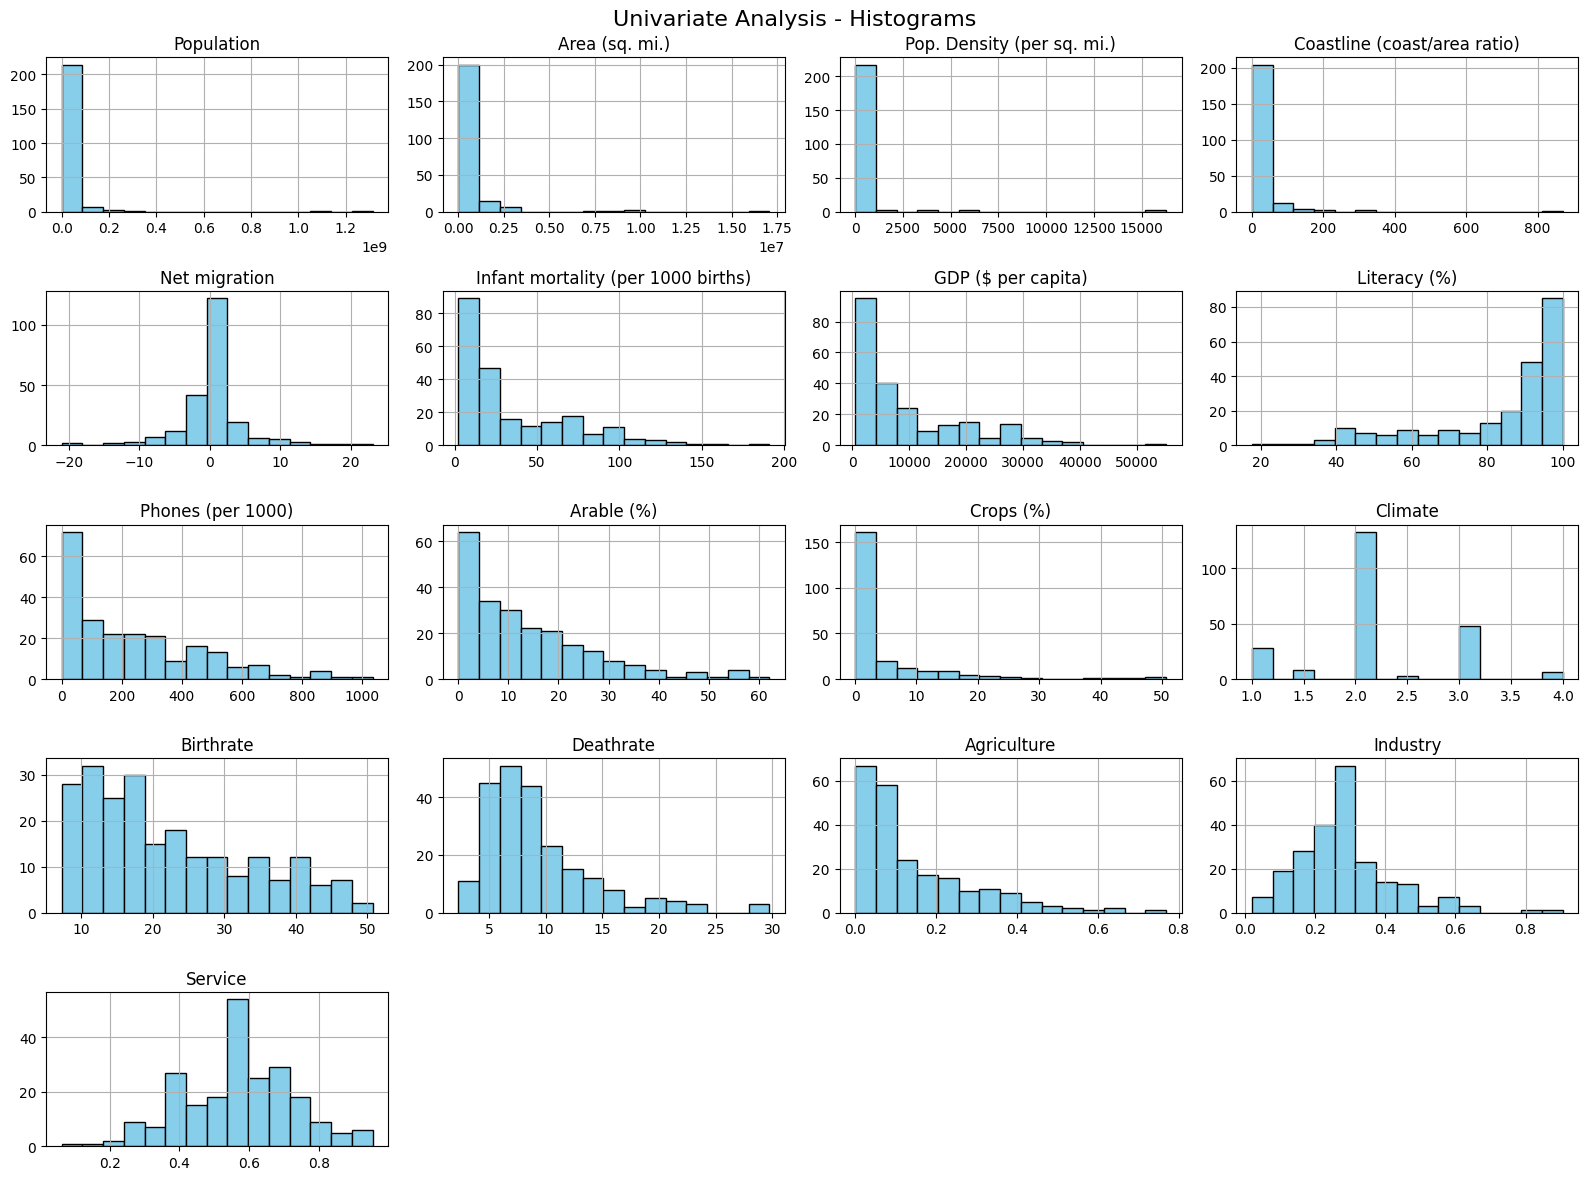

In [93]:
# Univariate Analysis
df.hist(bins=15, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis - Histograms', fontsize=16)
plt.tight_layout()
plt.show()

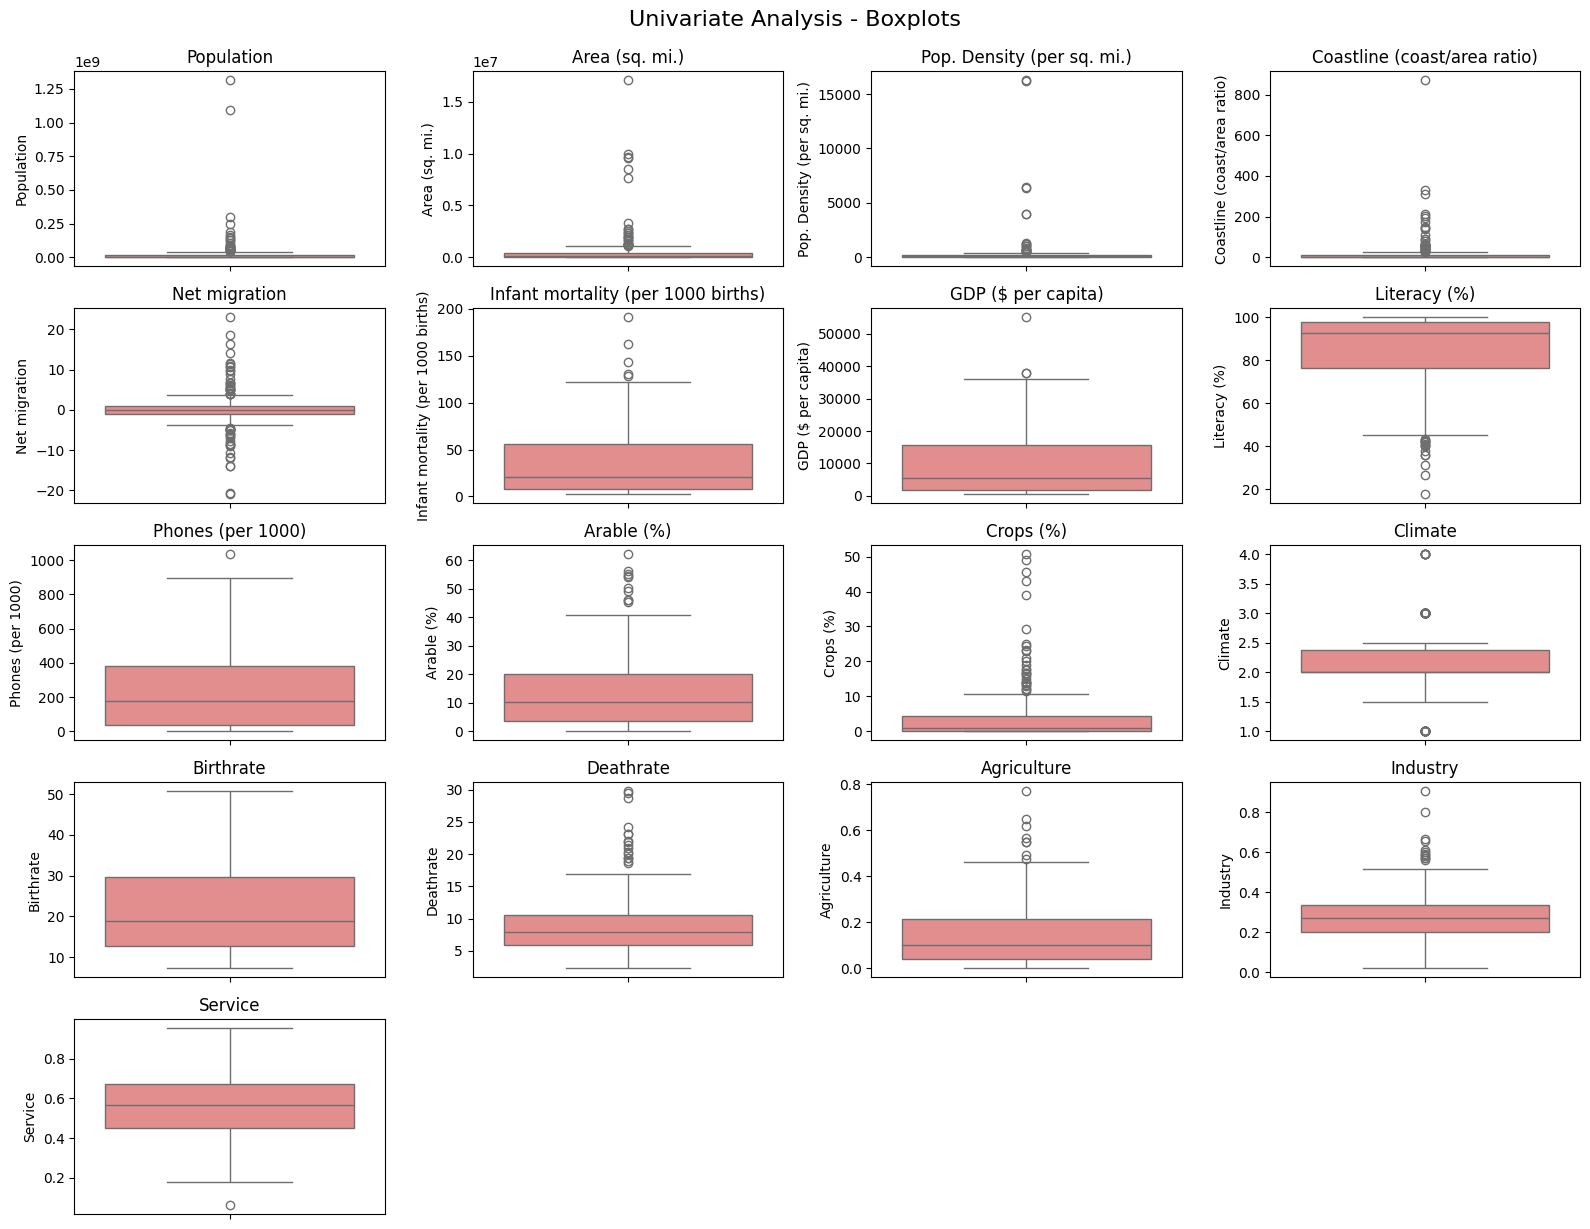

In [94]:
# Boxplots to check outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
    plt.tight_layout()
plt.suptitle('Univariate Analysis - Boxplots', fontsize=16, y=1.02)
plt.show()

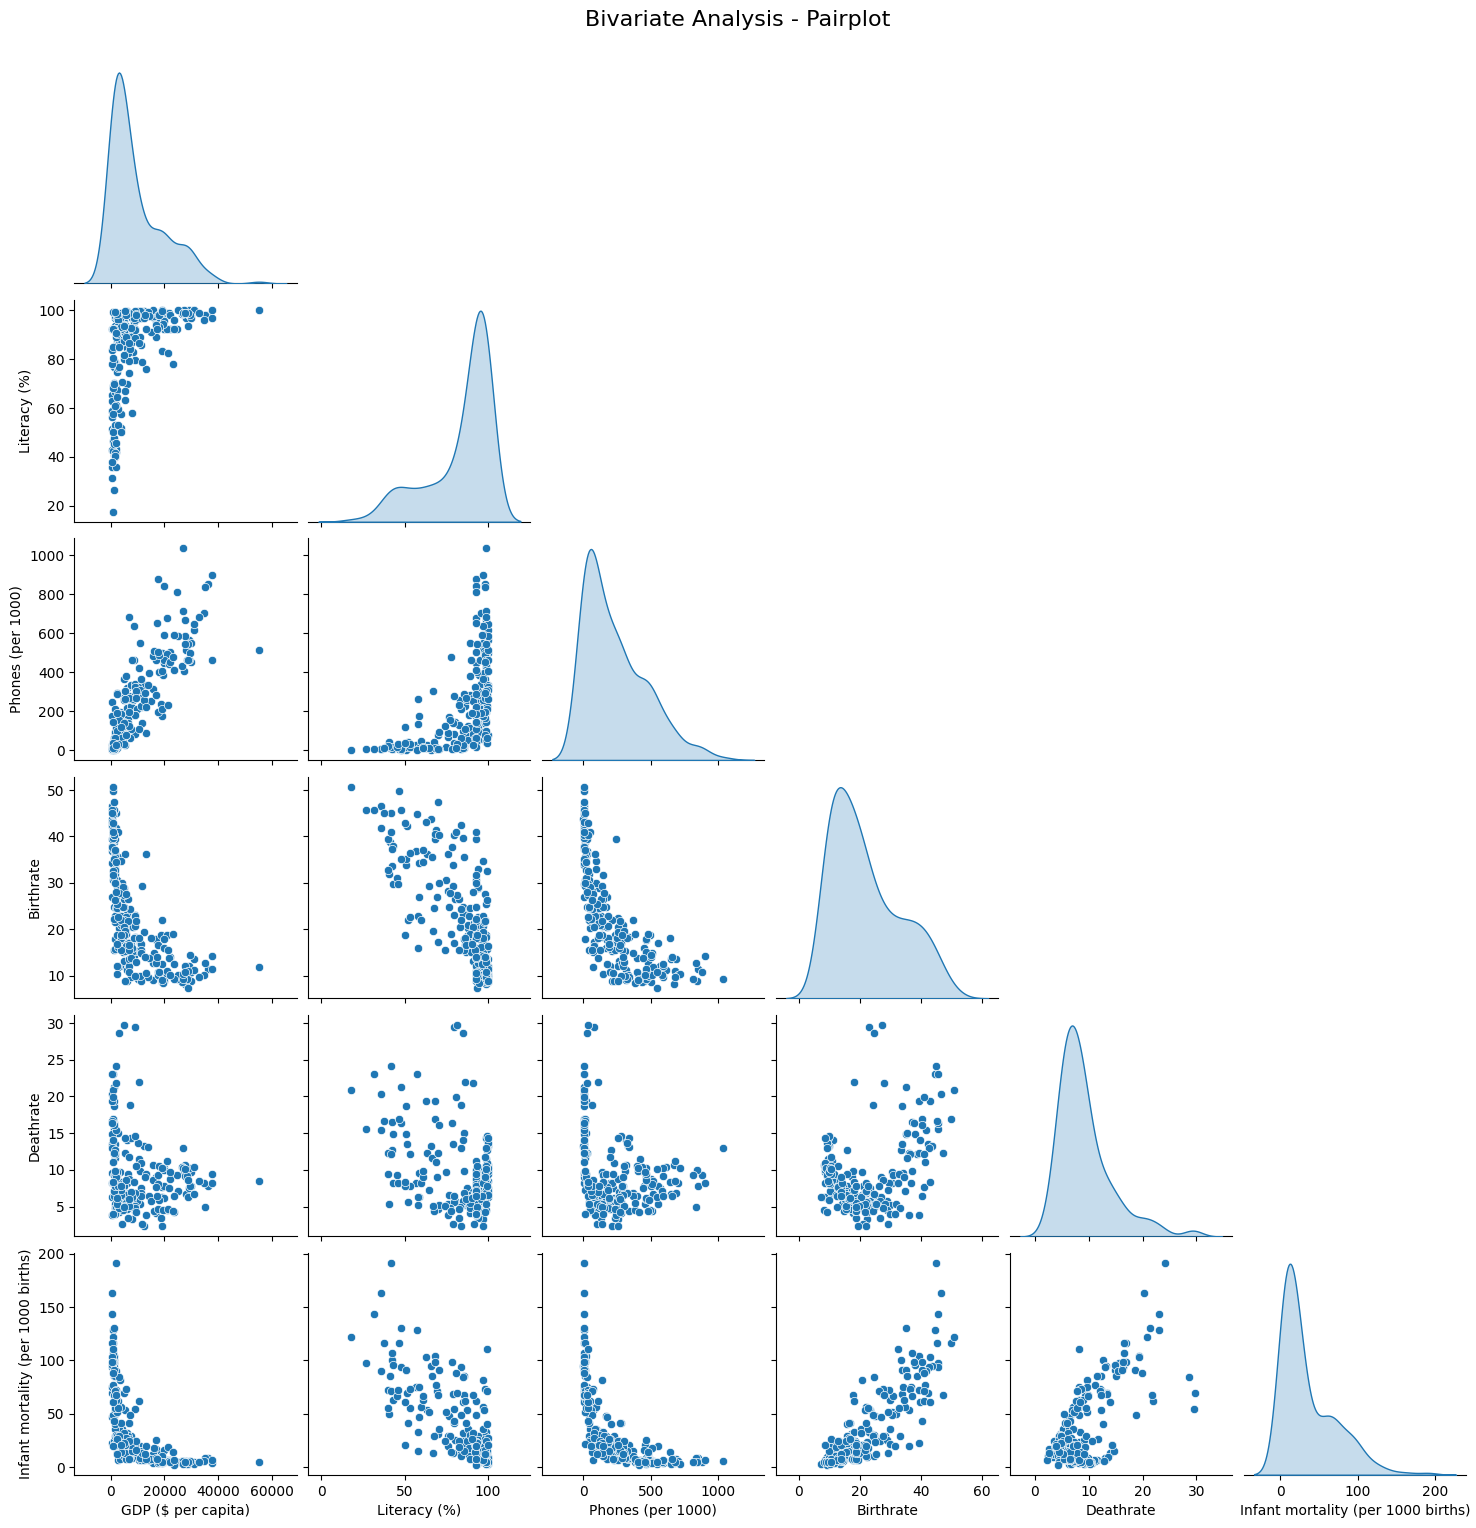

In [95]:
subset = df[['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 
             'Birthrate', 'Deathrate', 'Infant mortality (per 1000 births)']]

sns.pairplot(subset, diag_kind='kde', corner=True)
plt.suptitle('Bivariate Analysis - Pairplot', fontsize=16, y=1.02)
plt.show()

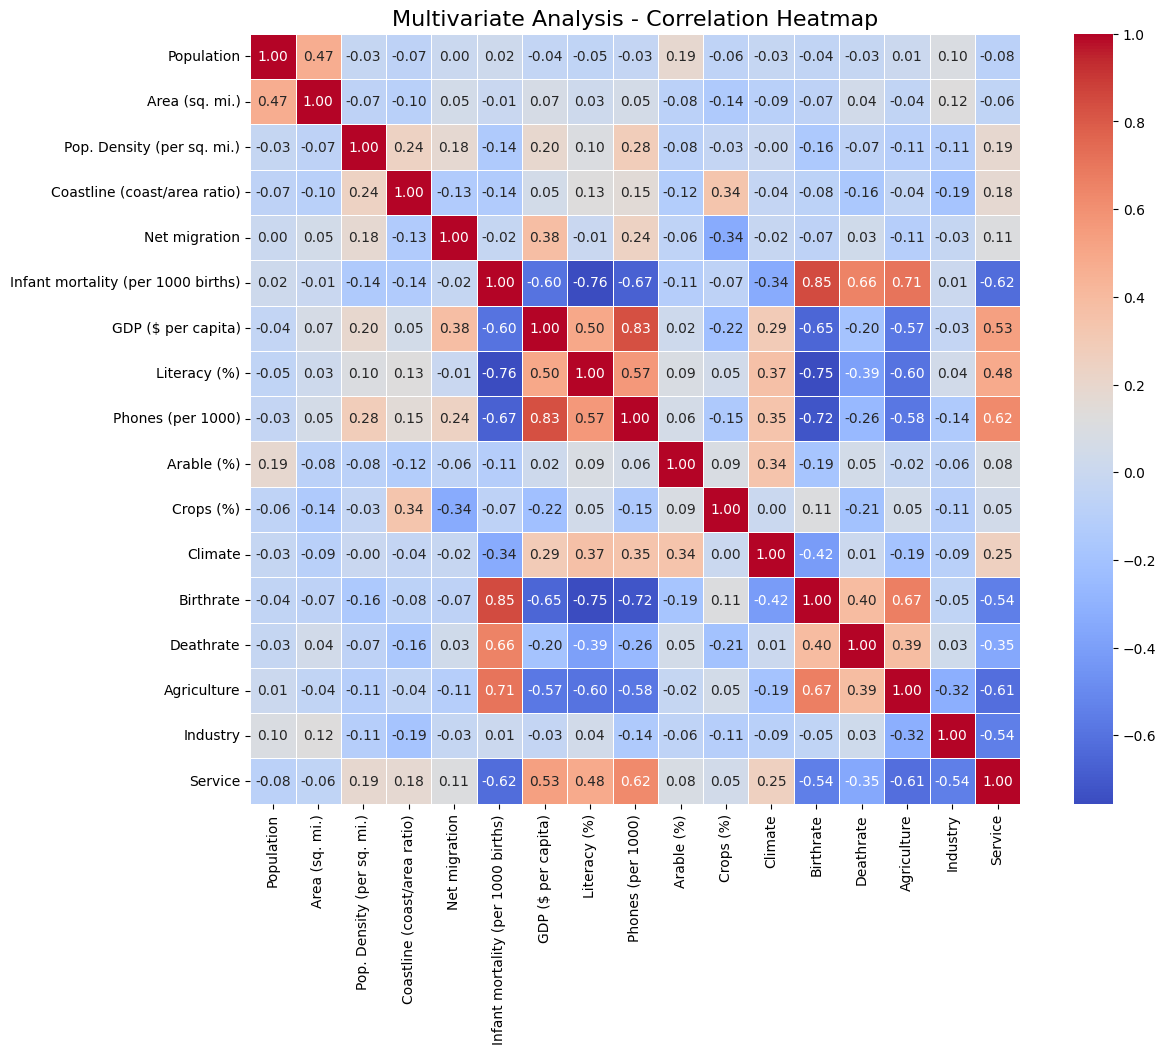

In [96]:
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Multivariate Analysis - Correlation Heatmap', fontsize=16)
plt.show()

In [97]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop('GDP ($ per capita)', axis=1) 
y = df['GDP ($ per capita)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Standard Encoder
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)       